# Tema I: Repaso de Regresión y Análisis Exploratorio
En este capitulo haremos un repaso del análisis exploratorio de datos (EDA) y ademas repasar aspectos importantes sobre modelos de regresión.

**Objetivo General:**
- Explorar relaciones entre variables haciendo uso de diferentes tipos de graficos.
- Aplicar regresión lineal.

**Objetivos Específicos:**
- Explorar relaciones entre variables de un dataset. (EDA)
- Explorar relaciones entre variables del dataset student performance por ejemplo preparación del test con horas de estudio, etc.
- Aplicar regresión lineal para predecir calificaciones.

# Que es el análisis de datos predictivos?

EL análisis de datos predictivos es el arte de construir y usar modelos que permitan tomar desiciones basados en patrones extraídos desde data histórica. 

Entre las aplicaciones tenemos: predicción de precios, predicción de dosis, evaluacion de riesgos, modelado de propensión (construir modelos que predigan futuras acciones del cliente basado en su comportamiento histórico, diagnóstico, clasifación automática de documentos).

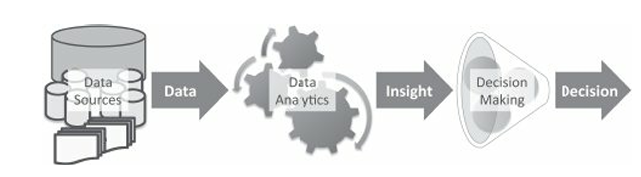

**Dentro esta categoria esta ChatGPT?** Si/No ¿Por qué?

# Cómo lo hacemos? 

Machine Learning o aprendizaje automático es definido como un proceso automatizado que extrae patrones de los datos. Las técnicas de aprendizaje automático supervisado aprenden automáticamente un modelo de la relación entre un conjunto de características descriptivas y una característica objetivo. 
Generado el modelo, este es usado para realizar predicciones para nuevas instancias

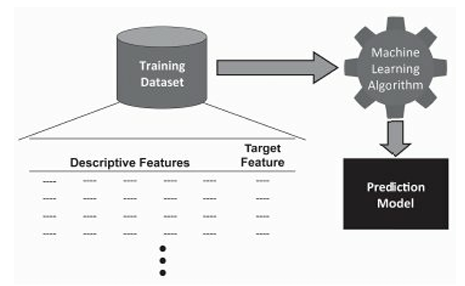

**Que necesitamos para definir las características descriptivas?**

EDA

# Flujo resolución problema usando analítica de datos

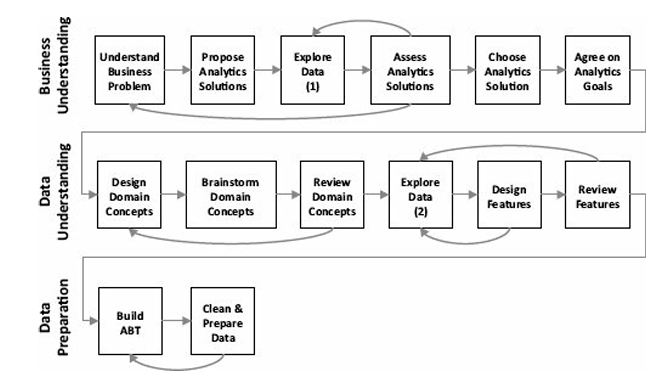

# EDA Exploratory data analysis - Analis exploratorio de datos

La exploración de datos tiene dos objetivos.
1. Entender completamente las características de la data. (Ej. tipos de valores de las variables, rangos, distribuciones, etc)
2. Determinar si el dataset sufre de algun tipo de problema de calidad (Ej. valores vacios, ruido, etc)

# Diferente tipos de datos

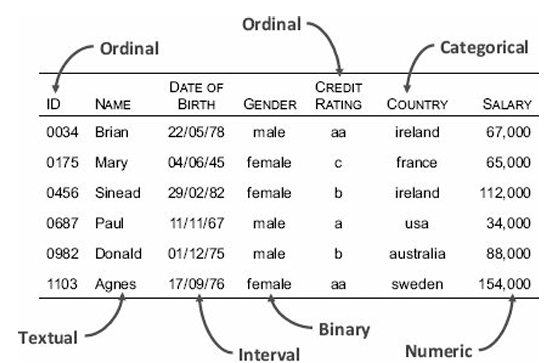

1. **Numérico:** Valores numéricos verdaderos que permiten operaciones aritméticas (p. ej., precio, edad).
2. **Intervalo:** Valores que permiten ordenar y restar, pero no otras operaciones aritméticas (p. ej., fecha, hora).
3. **Ordinal:** Valores que permiten ordenar, pero no operaciones aritméticas (p. ej., talla medida como pequeña, mediana o grande).
4. **Categórico:** Un conjunto finito de valores que no se pueden ordenar y no permiten operaciones aritméticas (p. ej., país, tipo de producto).
5. **Binario:** Un conjunto de solo dos valores (p. ej., género).
6. **Textual:** Datos de texto libres, generalmente cortos (p. ej., nombre, dirección).

ABT = Analytics base table/ dataset

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carga del dataset
direc = '/Users/leydi/MC Apli/StudentsPerformance.csv'
df = pd.read_csv(direc)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Exploración inicial del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.describe(include = 'object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Recordando gráficos más usados al momento de hacer un análisis exploratorio

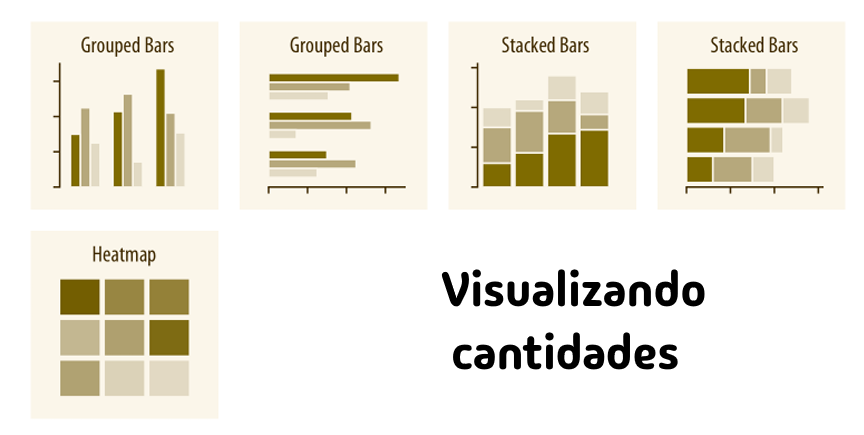

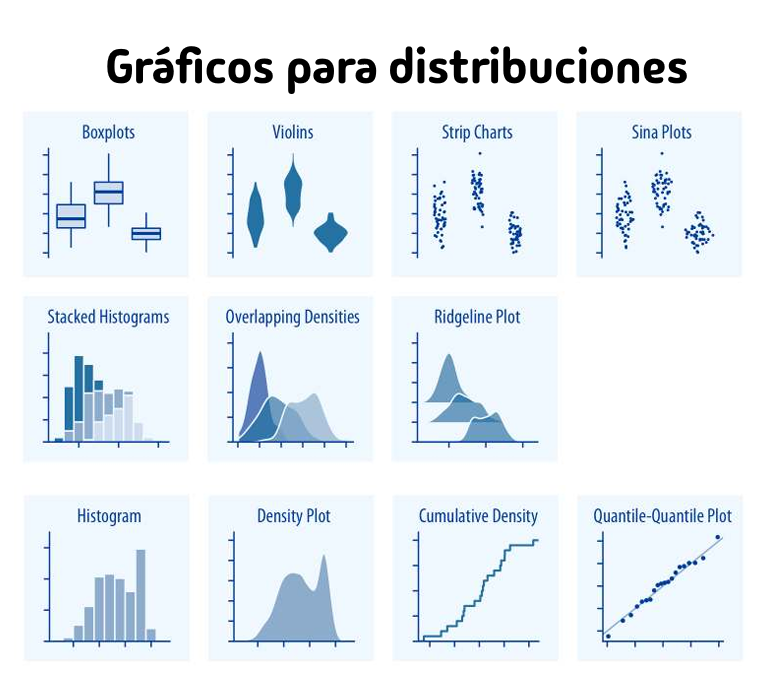

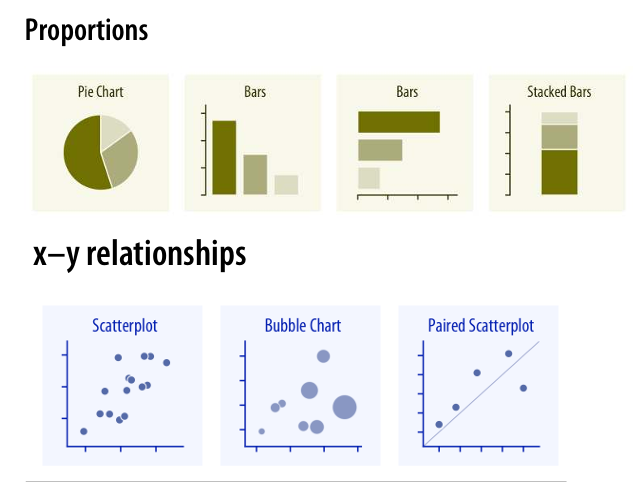

Text(0, 0.5, 'Frecuencia')

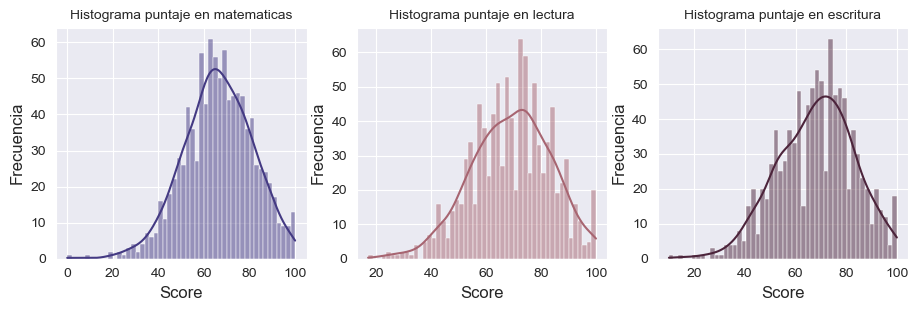

In [7]:
#Exploracion de dataset performance students
#Selecciona la cantidad correcta de bins
# Establecer el estilo
sns.set_style("darkgrid")

fig = plt.figure(figsize= (11, 3))
ax1 = fig.add_subplot(1,3,1)
ax1=sns.histplot(df['math score'], bins = 50, color = '#443A83',kde = True)
# Añadir títulos y etiquetas
plt.title('Histograma puntaje en matematicas', fontsize=10)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

ax2 = fig.add_subplot(1,3,2)
ax2=sns.histplot(df['reading score'], bins = 50, color = '#A76571', kde = True)
# Añadir títulos y etiquetas
plt.title('Histograma puntaje en lectura', fontsize=10)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

ax3 = fig.add_subplot(1,3,3)
ax3=sns.histplot(df['writing score'], bins = 50, color = '#4C243B', kde = True)
# Añadir títulos y etiquetas
plt.title('Histograma puntaje en escritura', fontsize=10)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

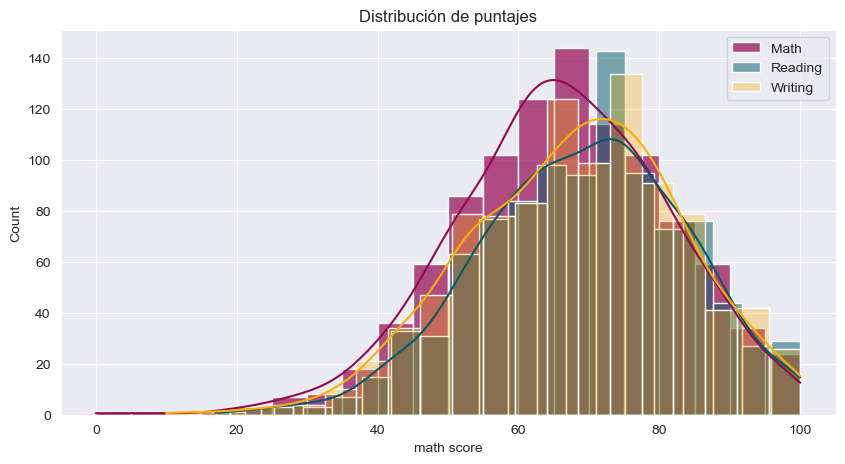

In [8]:
# Visualización de la distribución de calificaciones
plt.figure(figsize=(10,5))
sns.histplot(df['math score'], kde=True, color='#950952', label='Math', bins = 20,alpha = 0.7)
sns.histplot(df['reading score'], kde=True, color='#005C69', label='Reading', bins = 20, alpha = 0.5)
sns.histplot(df['writing score'], kde=True, color='#FBAF00', label='Writing',bins = 20, alpha = 0.3)
plt.legend()
plt.title('Distribución de puntajes')
plt.show()

# ¿Cúando usamos gráfico de violín?

Text(0, 0.5, 'Frecuencia')

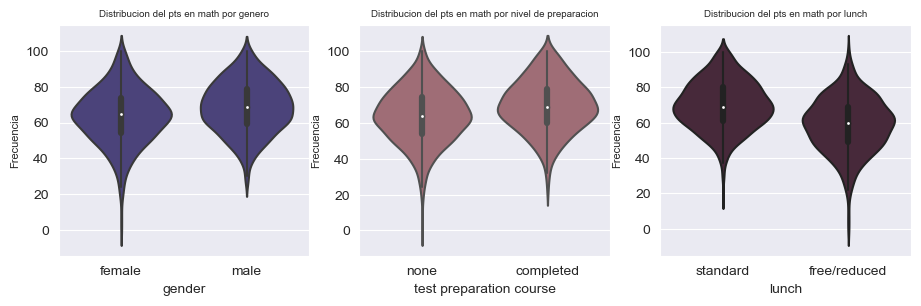

In [9]:
#Exploracion de dataset performance students
#Selecciona la cantidad correcta de bins

fig = plt.figure(figsize= (11, 3))
ax1 = fig.add_subplot(1,3,1)
ax1=sns.violinplot( data = df, y = 'math score', x = 'gender', color = '#443A83')
# Añadir títulos y etiquetas
plt.title('Distribucion del pts en math por genero', fontsize=7)
plt.ylabel('Frecuencia', fontsize=8)

ax2 = fig.add_subplot(1,3,2) 
ax2=sns.violinplot(data = df, y = 'math score', x = 'test preparation course',color = '#A76571')
# Añadir títulos y etiquetas
plt.title('Distribucion del pts en math por nivel de preparacion', fontsize=7)
plt.ylabel('Frecuencia', fontsize=8)

ax3 = fig.add_subplot(1,3,3)
ax3=sns.violinplot(data = df, y = 'math score', x = 'lunch', color = '#4C243B')
# Añadir títulos y etiquetas
plt.title('Distribucion del pts en math por lunch', fontsize=7)
plt.ylabel('Frecuencia', fontsize=8)

Text(0.5, 0, 'Nivel de educacion parental')

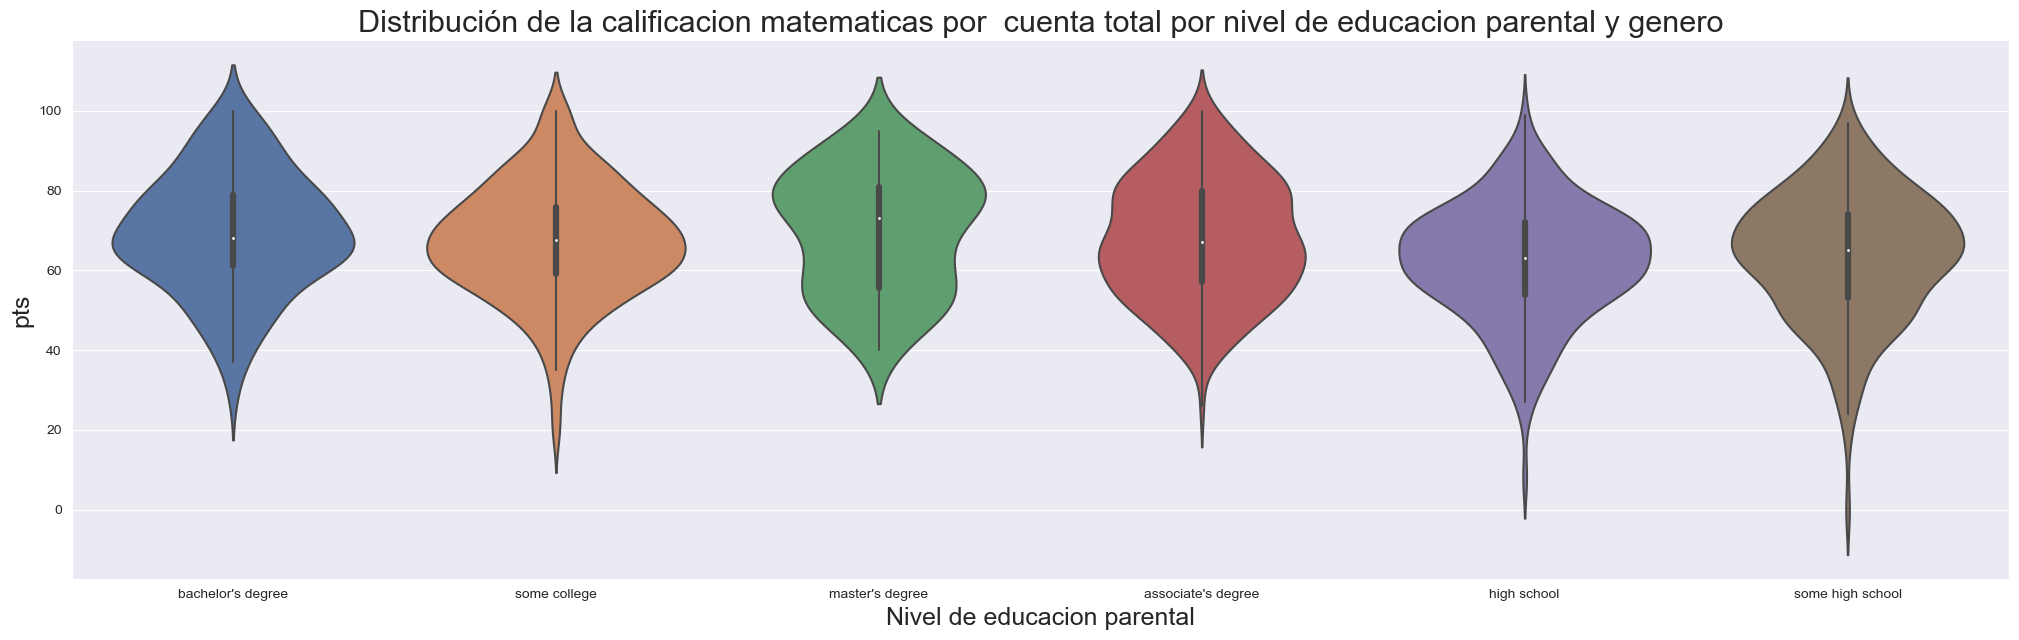

In [10]:
# Establecer el estilo
sns.set_style("darkgrid")

plt.figure(figsize=(25, 7))
sns.violinplot(x="parental level of education", y="math score", data=df, palette = 'deep')
plt.title("Distribución de la calificacion matematicas por  cuenta total por nivel de educacion parental y genero", fontsize=22)
plt.ylabel("pts",fontsize=18)
plt.xlabel("Nivel de educacion parental",fontsize=18)


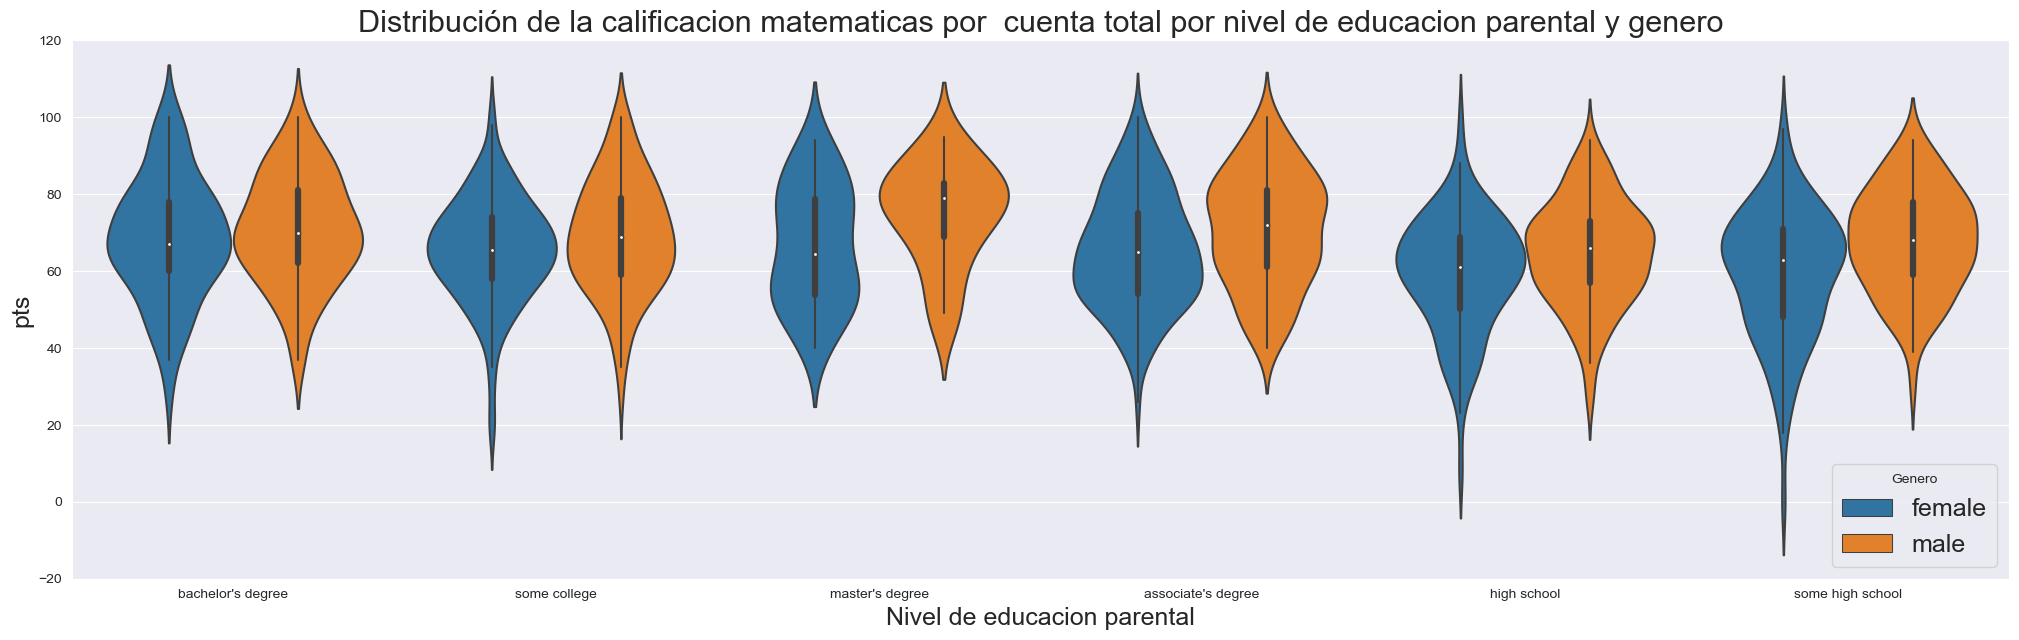

In [11]:
plt.figure(figsize=(25, 7))
sns.violinplot(x="parental level of education", y="math score", hue="gender", data=df)
plt.title("Distribución de la calificacion matematicas por  cuenta total por nivel de educacion parental y genero", fontsize=22)
plt.ylabel("pts",fontsize=18)
plt.xlabel("Nivel de educacion parental",fontsize=18)
plt.legend(title="Genero",fontsize=18) # Añadir una leyenda para el parámetro 'hue'
plt.show()

**Casos de uso comunes para gráficos de barras:**

1. **Comparación de frecuencias o recuentos:** los gráficos de barras se pueden utilizar para comparar la frecuencia o el recuento de puntos de datos en diferentes categorías. Por ejemplo, puede utilizar un gráfico de barras para comparar la cantidad de libros vendidos en diferentes géneros.
2. **Visualización de proporciones:** los gráficos de barras se pueden utilizar para mostrar proporciones, como el porcentaje de encuestados que seleccionaron cada opción en una encuesta.
3. **Visualización de cambios a lo largo del tiempo:** los gráficos de barras se pueden utilizar para mostrar cambios en datos categóricos a lo largo del tiempo, como la cantidad de ventas en diferentes meses o la cantidad de nuevos clientes en diferentes años.
4. **Comparación de múltiples variables:** al agrupar gráficos de barras, puede comparar múltiples variables simultáneamente. Por ejemplo, podría comparar la cantidad de libros vendidos por diferentes autores y por diferentes géneros.

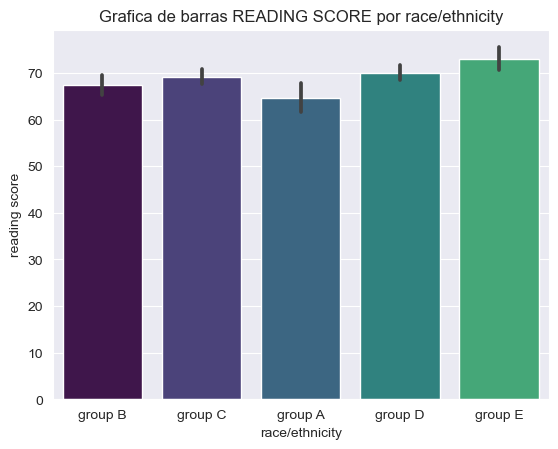

In [12]:
col=['#440D54','#443A83','#30688E','#22908C','#35B779'] 
sns.barplot(data = df, y = 'reading score', x = 'race/ethnicity', palette = col)
plt.title('Grafica de barras READING SCORE por race/ethnicity', fontsize=12)
plt.show()

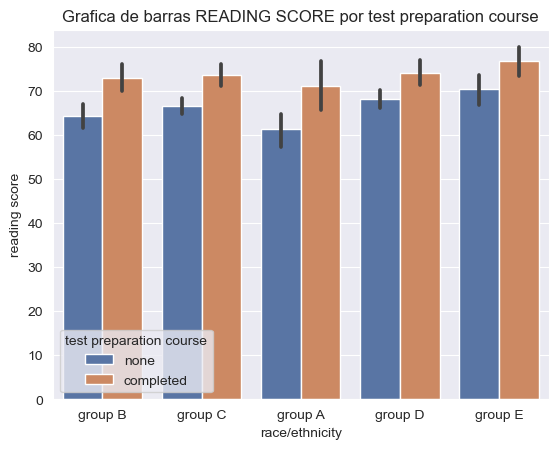

In [13]:
col=['#440D54','#443A83','#30688E','#22908C','#35B779'] 
sns.barplot(data = df, y = 'reading score', x = 'race/ethnicity', hue='test preparation course', palette = 'deep')
plt.title('Grafica de barras READING SCORE por test preparation course', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Grafica de barras MATH SCORE por race/ethnicity y genero')

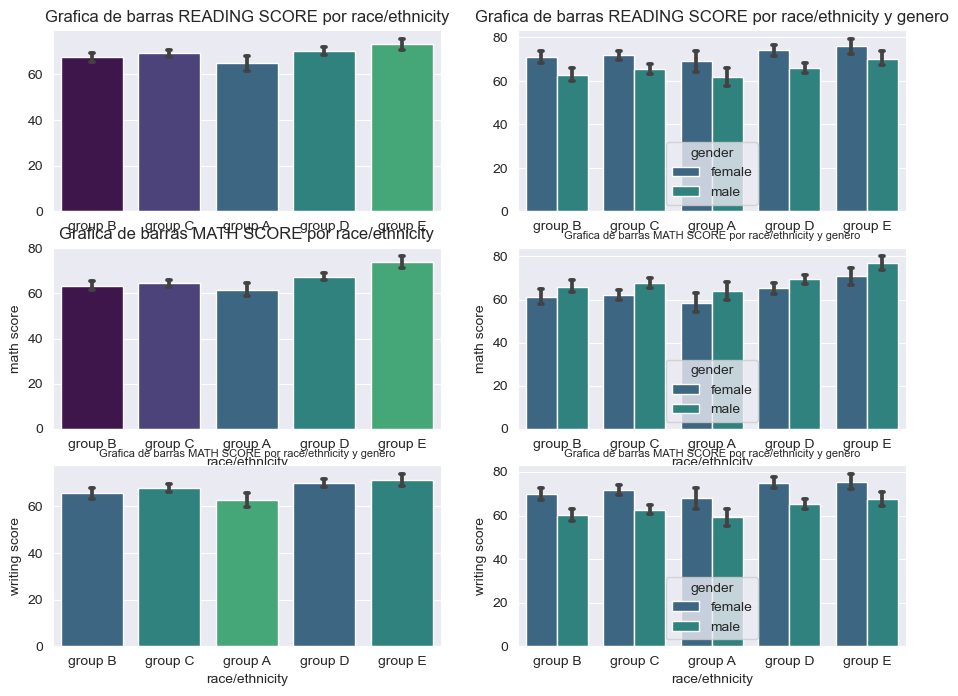

In [20]:
fig = plt.figure(figsize= (11, 8))
ax1 = fig.add_subplot(3,2,1)
col=['#440D54','#443A83','#30688E','#22908C','#35B779'] 
ax1 = sns.barplot(data = df, y = 'reading score', x = 'race/ethnicity', palette = col, capsize = 0.05)
# Añadir títulos y etiquetas
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.title('Grafica de barras READING SCORE por race/ethnicity', fontsize=12)


ax2 = fig.add_subplot(3,2,2) 
col=['#30688E','#22908C','#35B779'] 
ax2 = sns.barplot(data = df, y = 'reading score', x = 'race/ethnicity', hue='gender', palette = col, capsize = 0.05)
ax2.set_xlabel('')
ax2.set_ylabel('')
# Añadir títulos y etiquetas
plt.title('Grafica de barras READING SCORE por race/ethnicity y genero', fontsize=12)

ax3 = fig.add_subplot(3,2,3)
col=['#440D54','#443A83','#30688E','#22908C','#35B779'] 
ax3 = sns.barplot(data = df, y = 'math score', x = 'race/ethnicity', palette = col, capsize = 0.05)
# Añadir títulos y etiquetas
plt.title('Grafica de barras MATH SCORE por race/ethnicity', fontsize=12)


ax4 = fig.add_subplot(3,2,4) 
col=['#30688E','#22908C','#35B779'] 
ax4 = sns.barplot(data = df, y = 'math score', x = 'race/ethnicity', hue='gender', palette = col, capsize = 0.05)
# Añadir títulos y etiquetas
plt.title('Grafica de barras MATH SCORE por race/ethnicity y genero', fontsize=8)


ax5 = fig.add_subplot(3,2,5) 
col=['#30688E','#22908C','#35B779'] 
ax4 = sns.barplot(data = df, y = 'writing score', x = 'race/ethnicity', palette = col, capsize = 0.05)
# Añadir títulos y etiquetas
plt.title('Grafica de barras MATH SCORE por race/ethnicity y genero', fontsize=8)

ax5 = fig.add_subplot(3,2,6) 
col=['#30688E','#22908C','#35B779'] 
ax4 = sns.barplot(data = df, y = 'writing score', x = 'race/ethnicity', hue='gender', palette = col, capsize = 0.05)
# Añadir títulos y etiquetas
plt.title('Grafica de barras MATH SCORE por race/ethnicity y genero', fontsize=8)

Text(0.5, 1.0, 'Grafica de barras MATH SCORE por race/ethnicity')

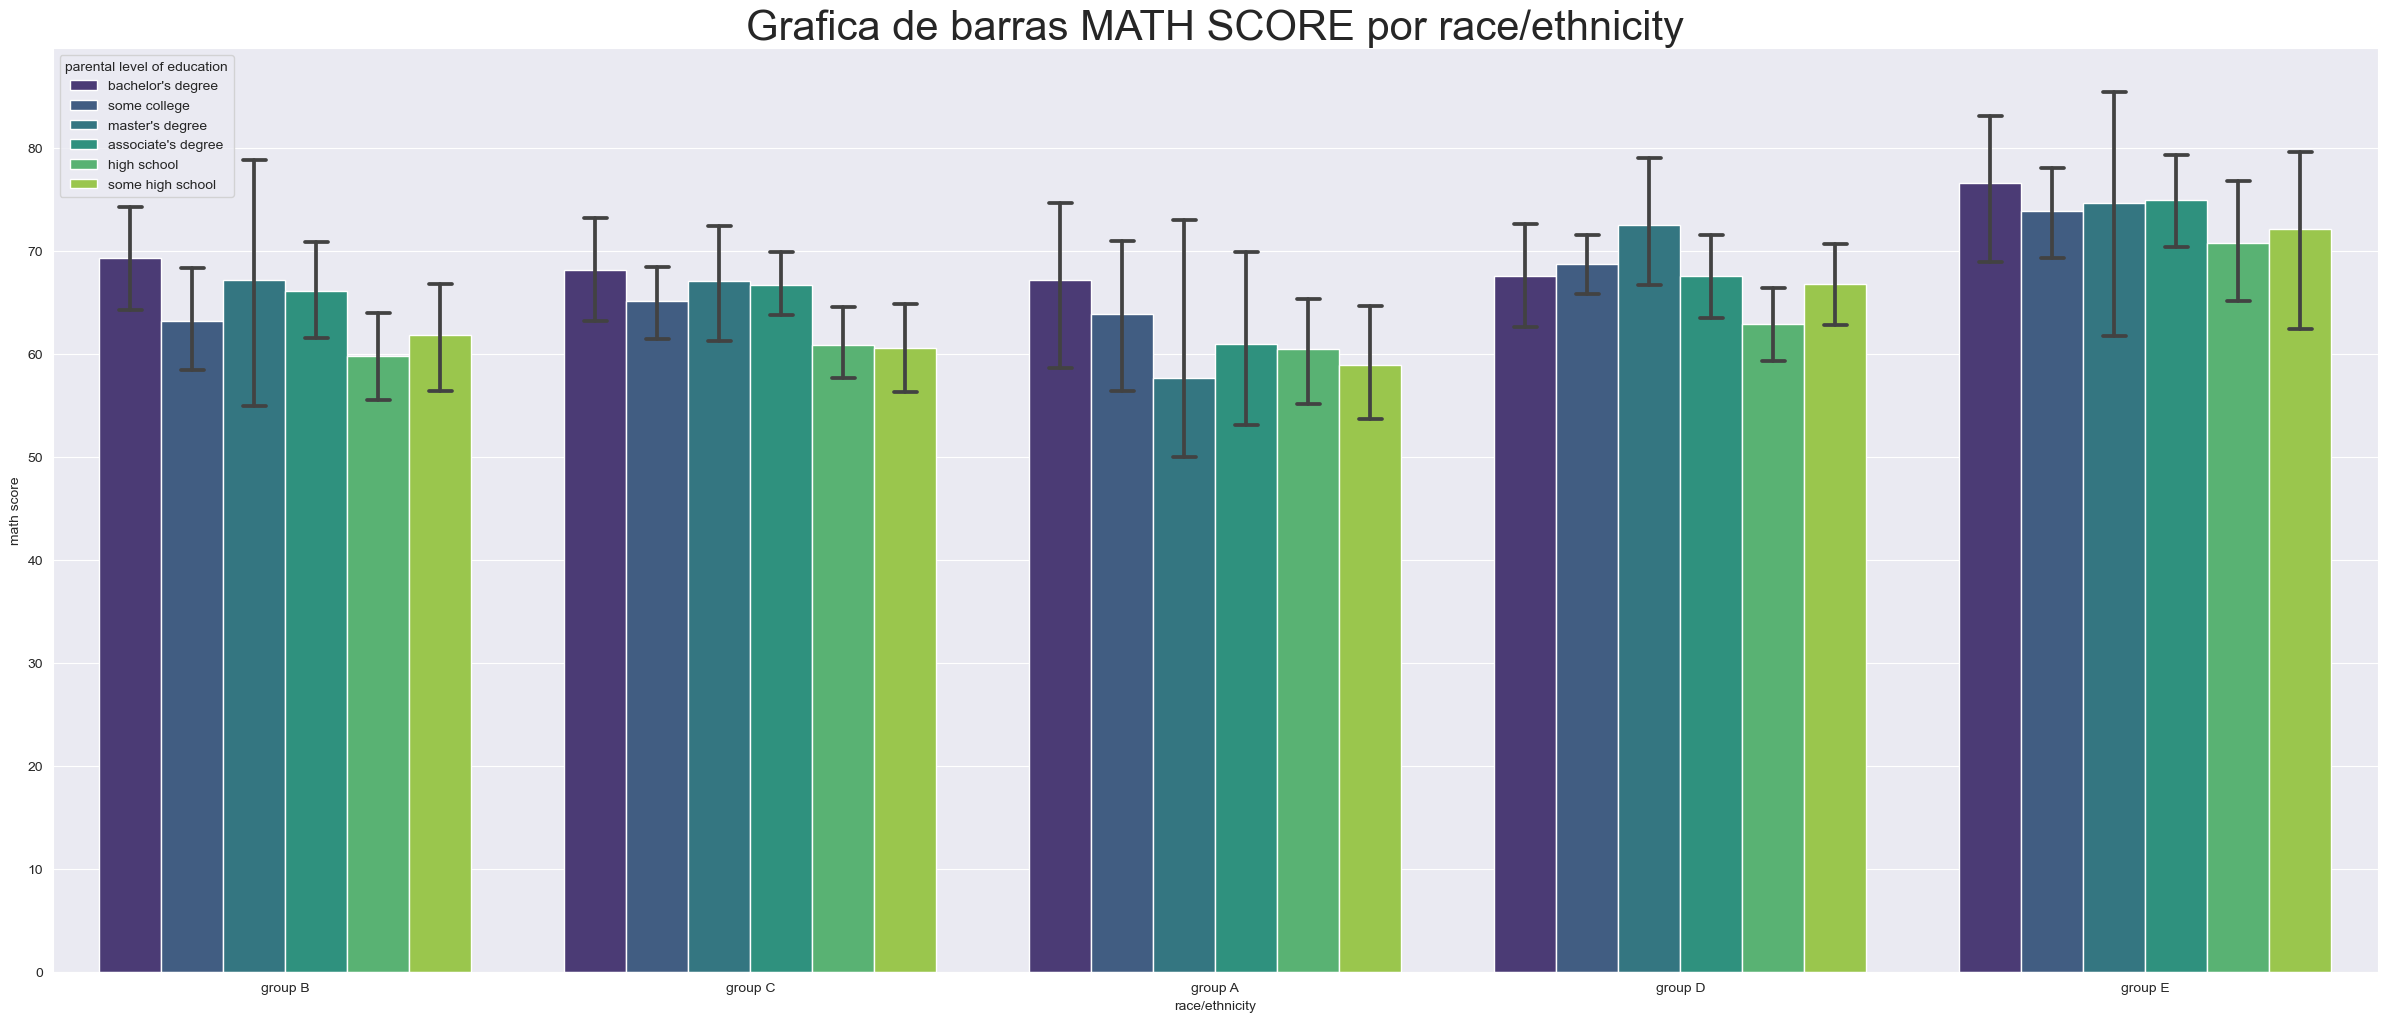

In [16]:
plt.figure(figsize=(30, 12))
col=['#440D54','#443A83','#30688E','#22908C','#35B779'] 
sns.barplot(data = df, y = 'math score', x = 'race/ethnicity', hue ='parental level of education', palette = 'viridis', capsize = 0.05)
# Añadir títulos y etiquetas
plt.title('Grafica de barras MATH SCORE por race/ethnicity', fontsize=30)

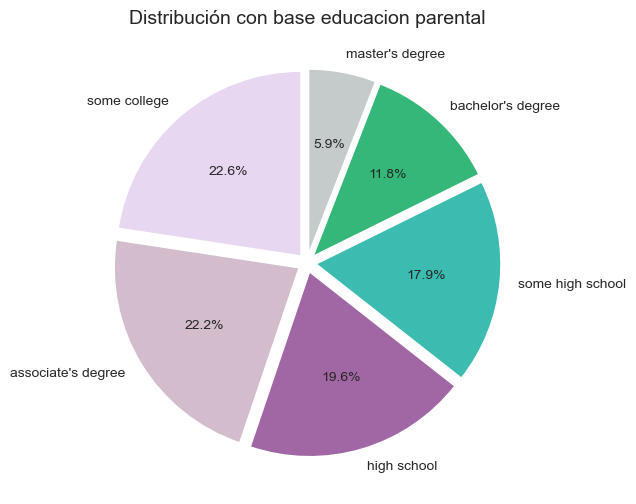

In [24]:
col=['#E8D7F1','#D3BCCC','#A167A5','#3CBBB1','#35B779', '#C4CBCA'] 
# declaring exploding pie 
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05] 
# 1. Agrupar y contar categorías
frequencies = df['parental level of education'].value_counts()

# 2. Graficar el pie chart
frequencies.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90, colors = col, explode = explode)

# 3. Añadir título
plt.title("Distribución con base educacion parental", fontsize=14)
plt.ylabel('')  # Opcional: elimina etiqueta del eje Y
plt.show()
#tienda.plot.pie(y = 'PromotionsCount')

# Gráficas de dispersión

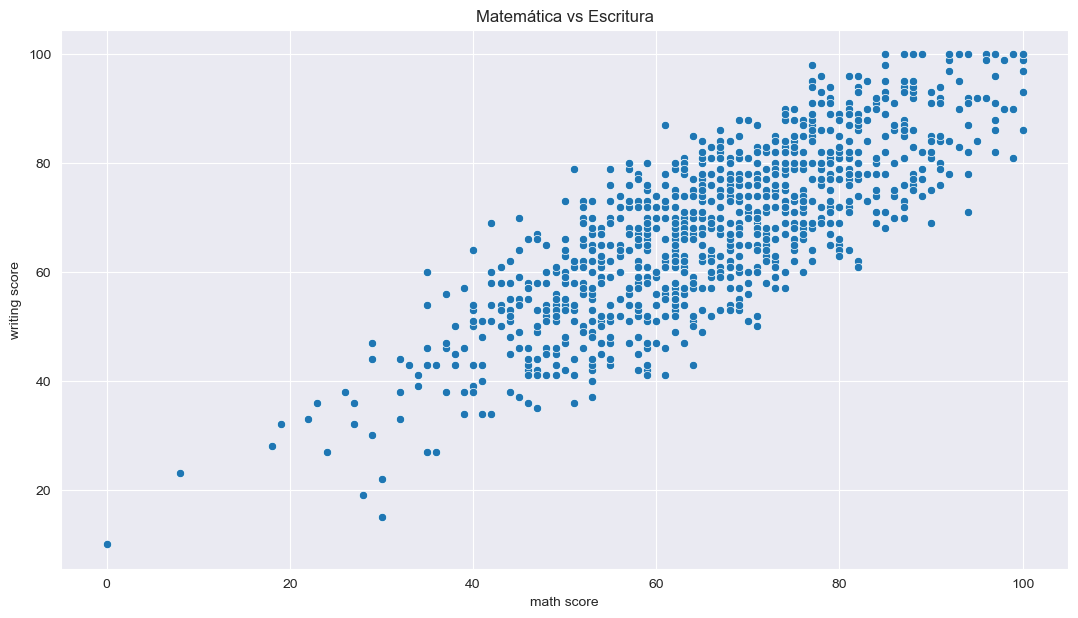

In [25]:
# Relación entre lectura y escritura
plt.figure(figsize=(13, 7))
sns.scatterplot(data=df, x='math score', y='writing score')
plt.title('Matemática vs Escritura')
plt.show()

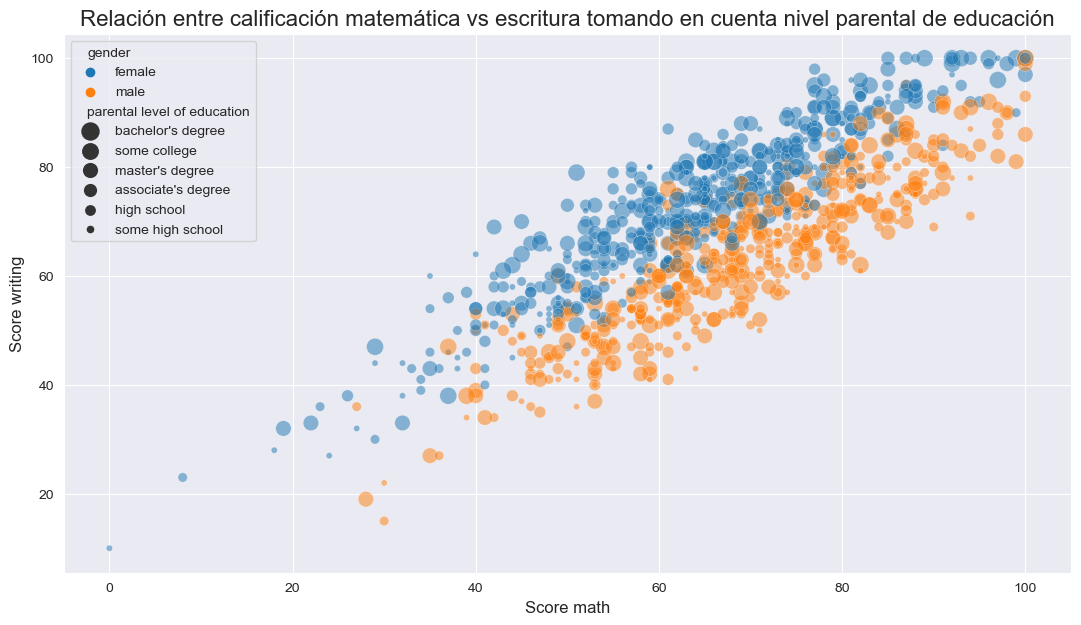

In [26]:
# Definimos area del grafico
plt.figure(figsize=(13, 7))
sns.scatterplot(data=df, x='math score', y='writing score', hue= 'gender', size = 'parental level of education', alpha = 0.5, sizes=(20, 150)) #que podemos concluir?

# Personalizar etiquetas y título
plt.title("Relación entre calificación matemática vs escritura tomando en cuenta nivel parental de educación", fontsize=16)
plt.xlabel("Score math", fontsize=12)
plt.ylabel("Score writing", fontsize=12)

# Mostrar el gráfico
plt.show()

# Graficas de pares

- Análisis multivariable

Diagramas de dispersion, permite visualizar simultáneamente las relaciones entre todas las combinaciones de pares de variables en un conjunto de datos.

<Figure size 2400x1200 with 0 Axes>

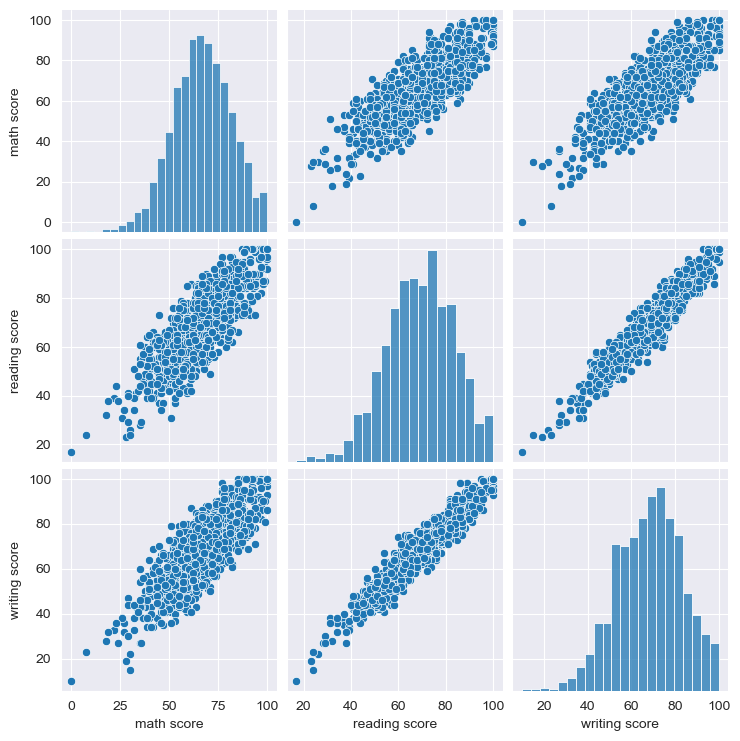

In [27]:
# Definimos area del grafico
plt.figure(figsize=(24, 12))
sns.pairplot(data=df)

<Figure size 2400x1200 with 0 Axes>

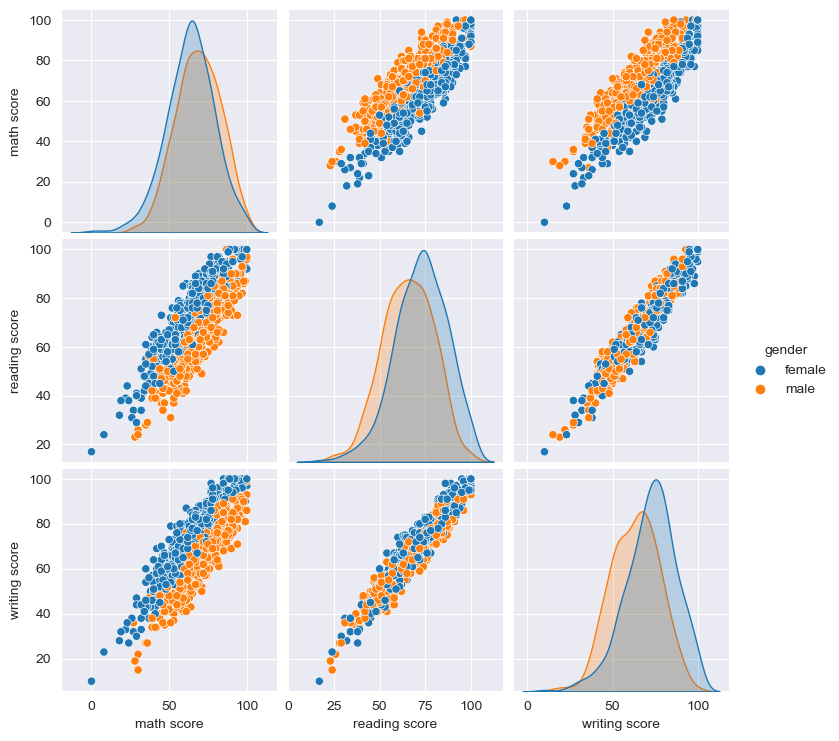

In [28]:
# Tambien podemos analizar las mismas relaciones tomando en cuenta a las variables categoricas
plt.figure(figsize=(24, 12))
sns.pairplot(data=df,hue = 'gender')

<Figure size 2400x1200 with 0 Axes>

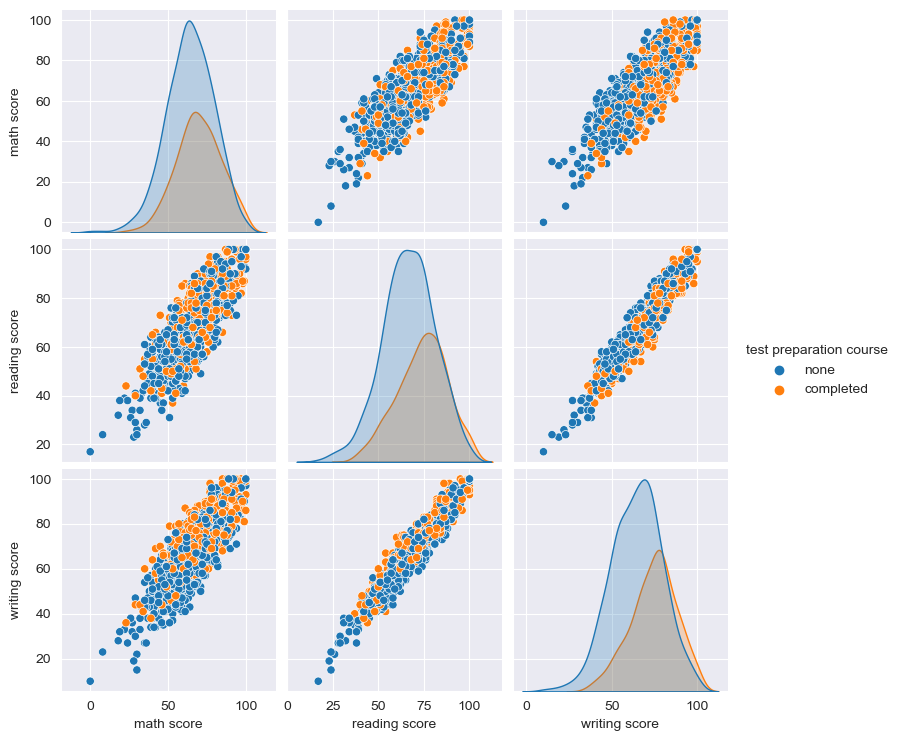

In [29]:
# Tambien podemos analizar las mismas relaciones tomando en cuenta a las variables categoricas
plt.figure(figsize=(24, 12))
sns.pairplot(data=df,hue = 'test preparation course')

<Figure size 2400x1200 with 0 Axes>

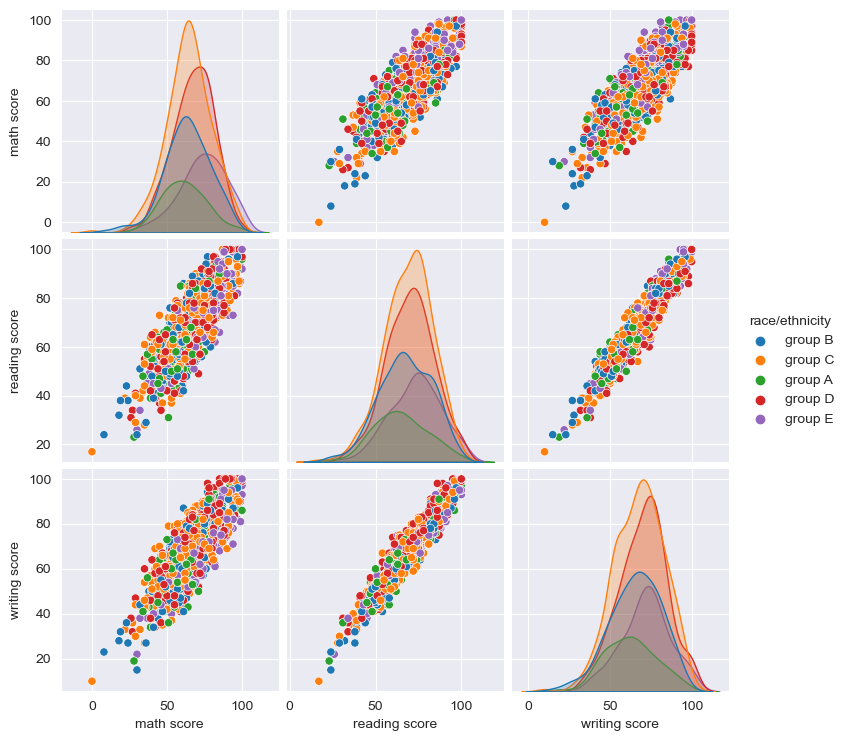

In [30]:
# Tambien podemos analizar las mismas relaciones tomando en cuenta a las variables categoricas
plt.figure(figsize=(24, 12))
sns.pairplot(data=df,hue = 'race/ethnicity')

# Relaciones entre variables (Correlacion & covarianza)

# Covarianza

La covarianza es una medida estadística que examina la relación direccional entre dos variables. Es una forma de medir cuánto cambian juntas dos variables aleatorias. Es como la varianza, pero muestra cómo cambian juntas dos variables en lugar de cómo cambia una sola variable. Es una técnica esencial para comparar las relaciones entre múltiples variables.

En una covarianza de alta calidad, las dos variables se mueven en la misma dirección, y en una covarianza mala las variables se mueven en direcciones opuestas. Por ejemplo, si la covarianza es 0, significa que no hay relación entre las variables.

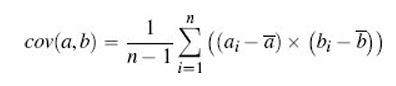

<Axes: >

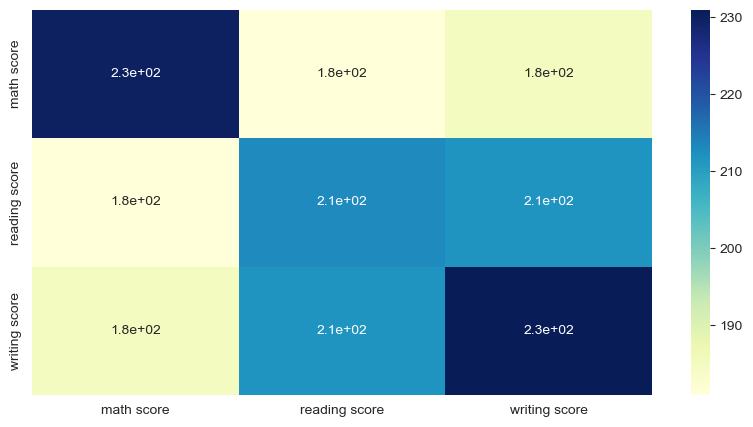

In [31]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.cov(numeric_only = True), annot=True, cmap="YlGnBu")

La interpretación de los valores es crucial:

**Valores de la diagonal (varianzas):**

1. Un valor grande significa que esa variable tiene una gran dispersión de datos.
2. Un valor pequeño significa que los datos de esa variable están muy agrupados alrededor de su media.

**Valores fuera de la diagonal (covarianzas):**

1. Signo Positivo (+): Indica una relación lineal directa. A medida que una variable aumenta, la otra tiende a aumentar. Ejemplo: Si la covarianza entre "Altura" y "Peso" es positiva, significa que las personas más altas tienden a ser más pesadas, y viceversa.
2. Signo Negativo (-): Indica una relación lineal inversa. A medida que una variable aumenta, la otra tiende a disminuir. Ejemplo: Si la covarianza entre "Horas de estudio" y "Número de errores en un examen" es negativa, significa que a más horas de estudio, menos errores se cometen.
3. Valor cercano a Cero (0): Indica que no hay una relación lineal discernible entre las variables. Es importante destacar que "no lineal" no significa "sin relación". Podría haber una relación no lineal (curva, por ejemplo) que la covarianza no capta.

Los valores llegan a adotar diferentes numeros dado que cuando se realiza el calculo no existe una estandarizacion como cuando calculamos la correlacion

# Coeficiente de pearson

Cuando tenemos más de tres o cuatro variables cuantitativas, las matrices de diagramas de dispersión de todos contra todos se vuelven rápidamente difíciles de manejar. En este caso, es más útil cuantificar la cantidad de asociación entre pares de variables y visualizar estas cantidades en lugar de los datos en bruto. 

Una forma común de hacer esto es calcular los coeficientes de correlación. El coeficiente de correlación r es un número entre -1 y 1 que mide en qué medida dos variables covarían. **Un valor de r = 0 significa que no hay asociación alguna, y un valor de 1 o -1 indica una asociación perfecta**. El signo del coeficiente de correlación indica si las variables están correlacionadas (los valores más grandes en una variable coinciden con los valores más grandes en la otra) o anticorrelacionadas (los valores más grandes en una variable coinciden con los valores más pequeños en la otra).

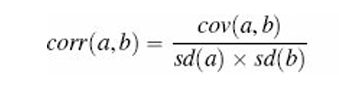

<Axes: >

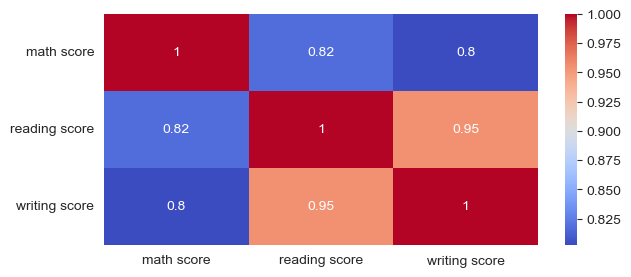

In [32]:
# Definimos area del grafico
plt.figure(figsize=(7, 3))
#sns.heatmap(df.corr(numeric_only = True), annot=True) #que podemos concluir?

#sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="YlGnBu") #tono de colores frios
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm") #tono de colores calidos

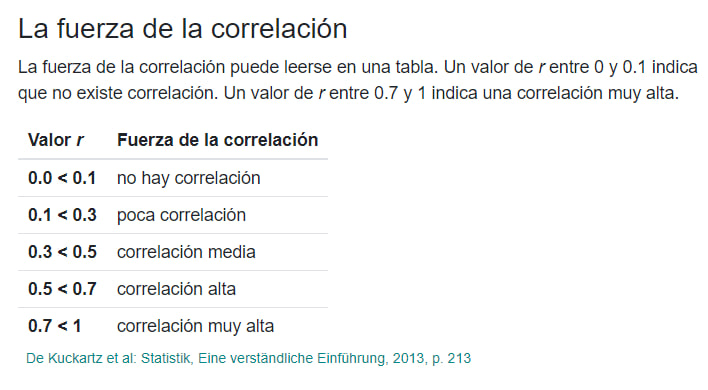

# Trabajemos en grupos